In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Rupita Tahsin

# __Artificial Neural Network 2: In-Class__

<img src= "https://images.theconversation.com/files/168081/original/file-20170505-21003-zbguhy.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" width="50%">

From: [theconversation.com](http://theconversation.com/deep-learning-and-neural-networks-77259)

## Learning objectives

At the end of the exercise, you should be able to improve models by:
- Creating alternative network architecture.
- Using different approaches to initialize weights,
- Choosing learning rates,
- Applying batch normalization,
- Explore different activation functions,
- Applying different optmiziers for finding weights.

## Outline

1. [Review pre-class assignment](#preclass)
1. [Early stopping](#architecture)
1. [Tuning other hyperparameters](#tuning)
1. [Putting things together](#together)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

I found the deep learning cross validation method a little confusing.

---
<a name="architecture"></a>
# 2. Deciding when to stop

## 2.1 Base model

In the 1st ANN session, we build a classification model for the Fashion MNIST dataset. 


&#9989; **<font color=blue>DO THIS:</font>** Get the data ready

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
fashion_train_data  =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
fashion_test_data  =  datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)
import torch
X_train_full = fashion_train_data.data
y_train_full = fashion_train_data.targets
X_test = fashion_test_data.data
y_test = fashion_test_data.targets
X_train = X_train_full[:2000]/255
X_valid = X_train_full[2000:3000]/255 
y_train = y_train_full[:2000]
y_valid = y_train_full[2000:3000]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw




Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



&#9989; **<font color=blue>DO THIS:</font>** Below is the base function toward the end of our 1st in-class session on ANN. Comment on the lines as indicated

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
def model_evaluate(net, X_test,y_test):
      pred_prob = net(X_test.float())
      corrects = 0
      for i in range(len(pred_prob)):
            pred_label = pred_prob[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred_prob)


net = Classifier()    ## constructs an object from the defined network class
import torch.optim as optim
criterion = torch.nn.NLLLoss() ## measures the quality of the fit 
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9) ## chooses an algorithm that will optimize the losses for training data
epochs = 200
net.train() ##Starts training data and updating weights
for e in range(epochs):
   optimizer.zero_grad() ##previous gradients are cleared
   pred = net(X_train)  ##generates output based on the input
   loss = criterion(pred,y_train) ##difference between predicted label and actual label
   loss.backward() ##compute the gradient of the loss function with respect to the parameters
   optimizer.step()##perform a gradient descent update
   print('Epoch: {} \t Training loss: {:.6f}'.format(e,loss.item()))
    
#model.eval()
print(f'test accuracy {model_evaluate(net,X_test,y_test)}')     ##Prints the accuracy of the model compared with the test/loss

Epoch: 0 	 Training loss: 2.298137
Epoch: 1 	 Training loss: 2.290440
Epoch: 2 	 Training loss: 2.276447
Epoch: 3 	 Training loss: 2.259363
Epoch: 4 	 Training loss: 2.239887
Epoch: 5 	 Training loss: 2.216432
Epoch: 6 	 Training loss: 2.187580
Epoch: 7 	 Training loss: 2.151097
Epoch: 8 	 Training loss: 2.105850
Epoch: 9 	 Training loss: 2.052073
Epoch: 10 	 Training loss: 1.992359
Epoch: 11 	 Training loss: 1.932554
Epoch: 12 	 Training loss: 1.877606
Epoch: 13 	 Training loss: 1.826720
Epoch: 14 	 Training loss: 1.778744
Epoch: 15 	 Training loss: 1.731428
Epoch: 16 	 Training loss: 1.661269
Epoch: 17 	 Training loss: 1.619728
Epoch: 18 	 Training loss: 1.602846
Epoch: 19 	 Training loss: 1.557209
Epoch: 20 	 Training loss: 1.525225
Epoch: 21 	 Training loss: 1.491658
Epoch: 22 	 Training loss: 1.463272
Epoch: 23 	 Training loss: 1.438980
Epoch: 24 	 Training loss: 1.399415
Epoch: 25 	 Training loss: 1.398117
Epoch: 26 	 Training loss: 1.375922
Epoch: 27 	 Training loss: 1.354815
Ep

&#9989; **<font color=blue>DO THIS:</font>** Instead of blindly stopping at a pre-defined number of iterations as we previously did, we now use a clearer way to determine where to stop so that we can use the best model/parameters in the testing stage. The code below accomplishs four things

1. For each iteration, we print out and keep track of the validation loss (the cost on the validation dataset). Since the validation data is not used for training, then in principle, the better the model performs on the validation dataset, the better it will perform on the test dataset. So, we use the validation loss as an indicator of the quality of the model during training.
1. Every time we see a new low of the validation loss, we save the current model parameters 
1. In the testing stage, we load the model that achieved the smallest validation loss and uses that for prediction
1. If we do not see a new low in 50 consecutive iterations, we stop the iteration (early stopping).

Now please read the code and comment on the lines as indicated. 

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" ## Code that prevent pyplot from crushing 

Epoch: 0 	 Training loss: 2.305291 	 Validation loss: 2.305132
Epoch: 1 	 Training loss: 2.299542 	 Validation loss: 2.299171
Epoch: 2 	 Training loss: 2.290103 	 Validation loss: 2.289616
Epoch: 3 	 Training loss: 2.278252 	 Validation loss: 2.277824
Epoch: 4 	 Training loss: 2.264441 	 Validation loss: 2.264120
Epoch: 5 	 Training loss: 2.248207 	 Validation loss: 2.247995
Epoch: 6 	 Training loss: 2.228415 	 Validation loss: 2.228325
Epoch: 7 	 Training loss: 2.203771 	 Validation loss: 2.203764
Epoch: 8 	 Training loss: 2.172361 	 Validation loss: 2.172627
Epoch: 9 	 Training loss: 2.131902 	 Validation loss: 2.132291
Epoch: 10 	 Training loss: 2.080814 	 Validation loss: 2.081211
Epoch: 11 	 Training loss: 2.019147 	 Validation loss: 2.019466
Epoch: 12 	 Training loss: 1.949975 	 Validation loss: 1.949885
Epoch: 13 	 Training loss: 1.878999 	 Validation loss: 1.877569
Epoch: 14 	 Training loss: 1.812671 	 Validation loss: 1.808509
Epoch: 15 	 Training loss: 1.757945 	 Validation l

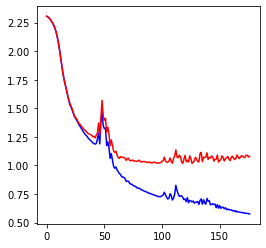

In [25]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
import torch.optim as optim
#criterion = torch.nn.MSELoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 300
net.train()
train_history = []
val_history = []
best_loss = 1e5
early_stopping = 0 
for e in range(epochs):
   optimizer.zero_grad()
   pred = net(X_train)
   loss = criterion(pred,y_train)
   val_loss = criterion(net(X_valid),y_valid) ## what does this line do?
   loss.backward()
   optimizer.step()
   train_history.append(loss.item())
   val_history.append(val_loss.item())
   if val_loss < best_loss:
      early_stopping = 0
      best_loss = val_loss
      torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #Saves the lowest loss parameters 
   else:
      early_stopping += 1     
   if early_stopping == 50:  #This stops iterating if no new low loss is found after 50 oterations
       break
   print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,loss.item(), val_loss.item()))
plt.figure(figsize=(4,4))
plt.plot(train_history, 'b', val_history,'r')
net.load_state_dict(torch.load('fashion_MNIST' + '.t7')) #loads the previously saved parameters for lowest loss and starts from there
print(f'test accuracy {model_evaluate(net,X_test,y_test)}') #prints the loss

&#9989; <font color=red>**QUESTION:**</font> Try the above code with various learning rates and epochs.
Discuss with your neighbors, how much improvement did you see with this new stopping strategy?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

- The test accuracy for the first example with no stopping criteria was 0.7622 whereas after implemneting the early stopping technique the accuracy went down to 0.752 for the same number of epochs=200 and learning rate =0.1. This indicates that for the defined epoch numbers and learning rate used here evn though the early stopping can reduce computational load by taking less time for prediction it is not necessarily more accurate than the actual case.

- We can try different learning rates and epochs and see how the two cases compare further

All same but 300 epochs:

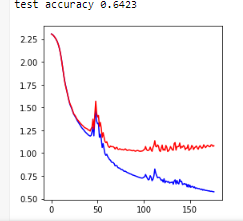

With same learning rate of 0.1 and 200 epochs the results look even worse (accuracy 0.40) in the early stopping case if the number of iterations before stoping is changed to 100 from 50 when no lower losses are found:

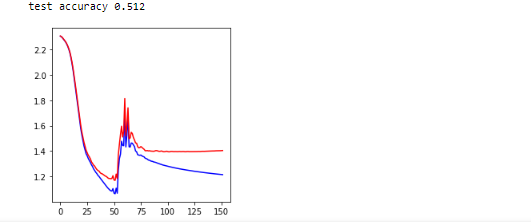

Lowering from 50 to 20 also get bad accuracy as below:

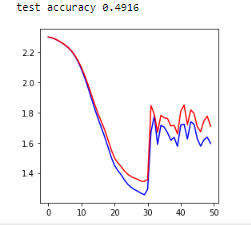

All same learning rate of 0.05:

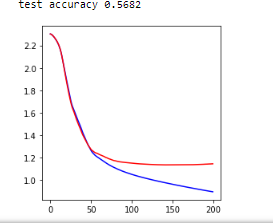

All same learning rate of 0.2:

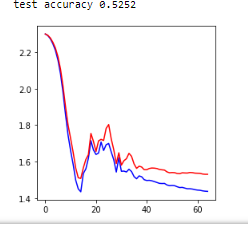

All same learning rate of 0.01:

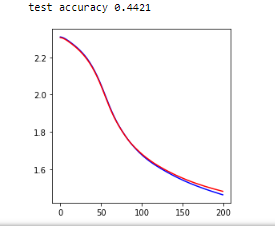

It seems like the 200 epochs and 0.1 learning rate is already the best optimum values, changing to lower or higher values is causing lower accuracy.

---
<a name="architecture"></a>
# 3. Changing network architecture

&#9989; **<font color=blue>DO THIS:</font>** To get an idea how large the current neural network is, we can use the torchsummary package. Run the following command to install the package and use it to print out a summary of the model

In [26]:
#!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from torchsummary import summary
summary(net,(784,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 300]         235,500
            Linear-2                  [-1, 100]          30,100
            Linear-3                   [-1, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.02
Estimated Total Size (MB): 1.02
----------------------------------------------------------------


&#9989; <font color=red>**QUESTION:**</font> The test accuracy in Section 2 is not very satisfactory. Try to modify the parameters to increase the test performances. 
  - the number of layers
  - number of nodes in each layer
  - learning rate
  - epochs
  - number of training samples
  - other types of activations

**It is highly recommended that you wrap up the code for the network initializaiton+training+testing into a function with the hyperparameters (number of layers, number of nodes, lr, epochs, etc.) as inputs, it will make the task of searching for the best parameters much easier**
 

In [35]:
#Put your code here
#defaukts were samples=2000, epochs=200, nodes=255,lr=0.1,momentum=0.9,layers=4

def ANN_accuracy(nodes,lr,epochs,samples,momentum):
    X_train = X_train_full[:samples]/nodes
    X_valid = X_train_full[samples:3000]/nodes
    y_train = y_train_full[:samples]
    y_valid = y_train_full[samples:3000]
    net = Classifier()    ## constructs an object from the defined network class
    criterion = torch.nn.NLLLoss() ## measures the quality of the fit 
    optimizer = optim.SGD(net.parameters(), lr, momentum) ## chooses an algorithm that will optimize the losses for training data
    net.train() ##Starts training data and updating weights
    for e in range(epochs):
       optimizer.zero_grad() ##previous gradients are cleared
       pred = net(X_train)  ##generates output based on the input
       loss = criterion(pred,y_train) ##difference between predicted label and actual label
       loss.backward() ##compute the gradient of the loss function with respect to the parameters
       optimizer.step()
       #print('Epoch: {} \t Training loss: {:.6f}'.format(e,loss.item()))

    #print(f'test accuracy {model_evaluate(net,X_test,y_test)}')
    return model_evaluate(net,X_test,y_test)




0.519


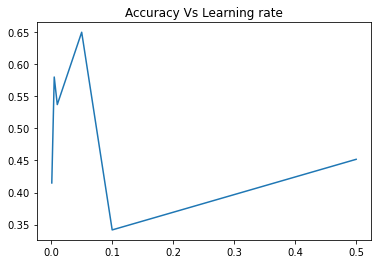

In [44]:
print(ANN_accuracy(255,0.1,200,2000,0.9))  #Base case

#Finding the best values for learning rate

LR=[0.001,0.005,0.01,0.05,0.1,0.5]
LR_accuracy=np.zeros(len(LR))

for i in range (0,len(LR)):
    LR_accuracy[i]=ANN_accuracy(255,LR[i],200,2000,0.9)
    
plt.plot(LR,LR_accuracy)
plt.title("Accuracy Vs Learning rate")
plt.show()

From the graph the best accuracy of the training method is when the learning rate is 0.05

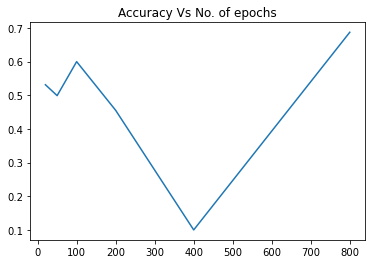

In [49]:
#Finding the best values for epochs

epochs=[20,50,100,200,400,800]
epoch_accuracy=np.zeros(len(epochs))

for i in range (0,len(epochs)):
    epoch_accuracy[i]=ANN_accuracy(255,0.1,epochs[i],2000,0.9)
    
plt.plot(epochs,epoch_accuracy)
plt.title("Accuracy Vs No. of epochs")
plt.show()

This plot suggests that the maximum accuracy can be found at 100 epochs approximately.

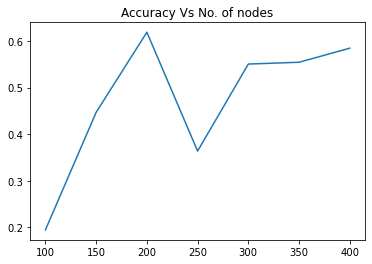

In [50]:
#Finding the best values for number of nodes

nodes=[100,150,200,250,300,350,400]
node_accuracy=np.zeros(len(nodes))

for i in range (0,len(nodes)):
    node_accuracy[i]=ANN_accuracy(nodes[i],0.1,200,2000,0.9)
    
plt.plot(nodes,node_accuracy)
plt.title("Accuracy Vs No. of nodes")
plt.show()

The plot suggests max accuracy at 200 nodes

In [51]:
print(ANN_accuracy(200,0.05,100,2000,0.9))  #Case after optimizing 3 parameters

0.3593


Surprisingly, if I kept all parameters equal to base and observe effect of one parameter at a time and choose that the model accuracy is rather going down to 0.35 from the original 0.7. So the factors have interdependency and it is not so simple to find the best accuracy.

In [73]:
#The best case I got from random combinations is below

print("Best accuracy obtained is :",ANN_accuracy(256,0.05,400,2800,0.9))

Best accuracy obtained is : 0.7522


&#9989; **<font color=blue>DO THIS:</font>** Report the best performance you get:

- for each parameter setting, you should train the network 10 times and report the average test accuracy
- post your parameters and accuracy in [this Google Spreadsheet](https://docs.google.com/spreadsheets/d/18zfhKed3VbWuMjTXtyrwuJel0rwmJLPMtlNJFhblvhs/edit?usp=sharing)

-----
### Congratulations, we're done!